In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [16]:
# Đọc dữ liệu
df_HN = pd.read_csv('AQI_HaNoi_Done.csv')
df_DN = pd.read_csv('AQI_DaNang_Done.csv')
df_VT = pd.read_csv('AQI_VietTri_Done1.csv')

In [17]:
# Chia dữ liệu train, test, validate theo tỉ lệ 6:2:2

# Hà Nội
train_size_HN = int(0.6 * len(df_HN))
test_size_HN = int(0.2 * len(df_HN))
val_size_HN = len(df_HN) - train_size_HN - test_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]
val_data_HN = df_HN[train_size_HN+test_size_HN:]

# Đà Nẵng
train_size_DN = int(0.6 * len(df_DN))
test_size_DN = int(0.2 * len(df_DN))
val_size_DN = len(df_DN) - train_size_DN - test_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]
val_data_DN = df_DN[train_size_DN+test_size_DN:]

#Việt Trì
train_size_VT = int(0.6 * len(df_VT))
test_size_VT = int(0.2 * len(df_VT))
val_size_VT = len(df_VT) - train_size_VT - test_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]
val_data_VT = df_VT[train_size_VT+test_size_VT:]

In [18]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [19]:
# Dự đoán trên tập test, validate, và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
val_pred_HN = model_HN.forecast(len(val_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
val_pred_DN = model_DN.forecast(len(val_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
val_pred_VT = model_VT.forecast(len(val_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT))

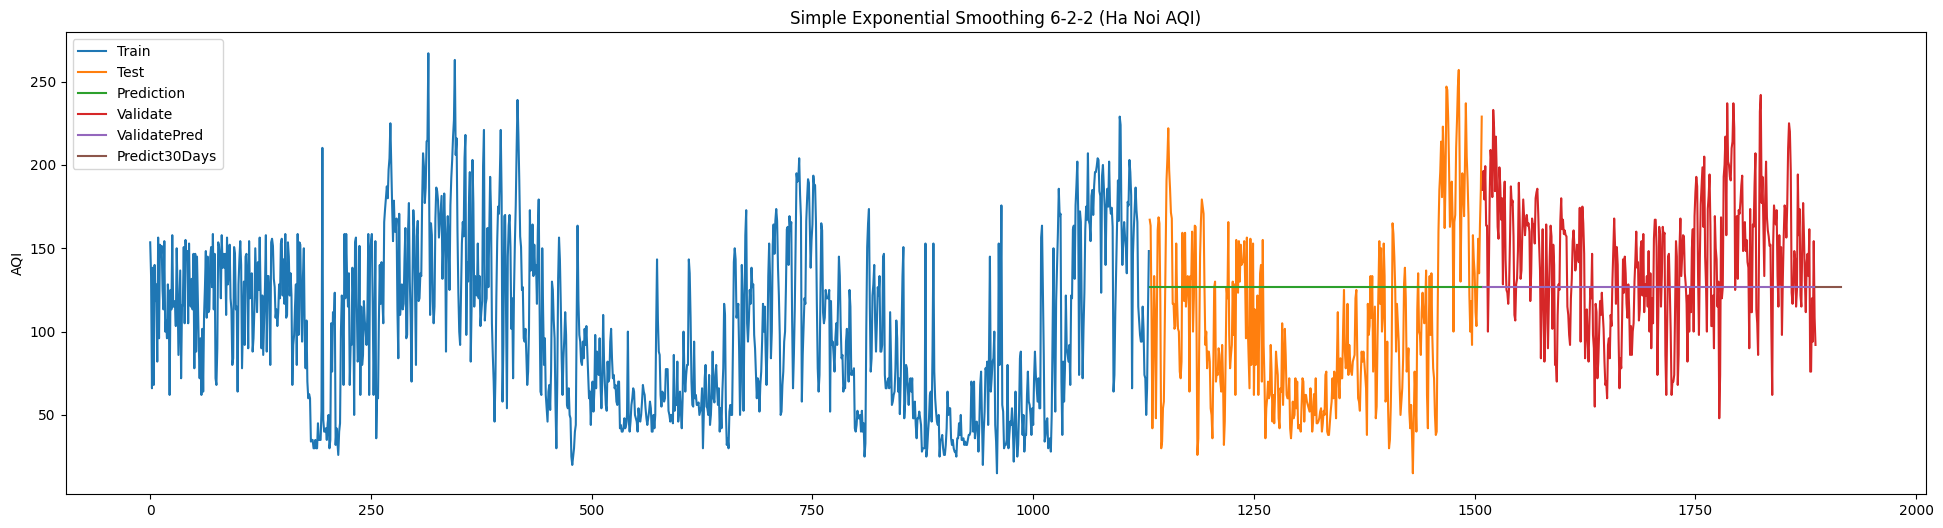

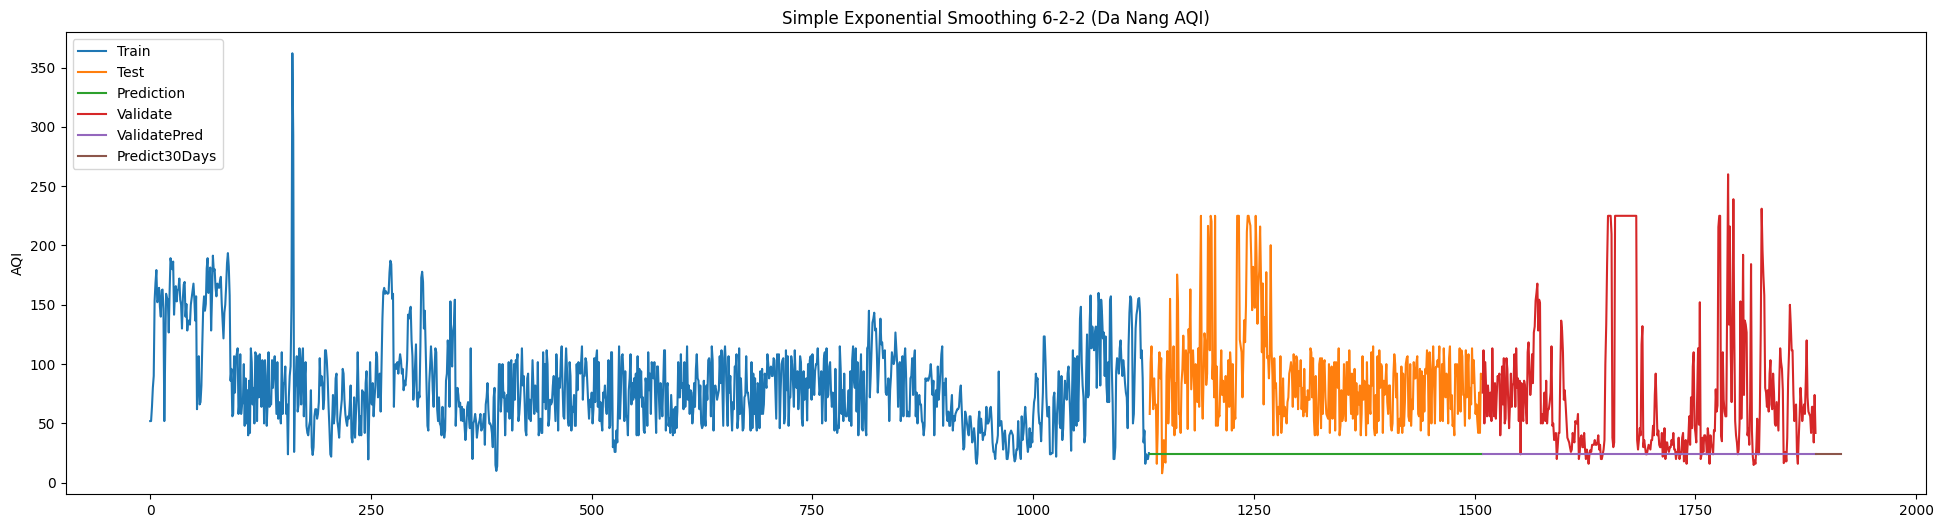

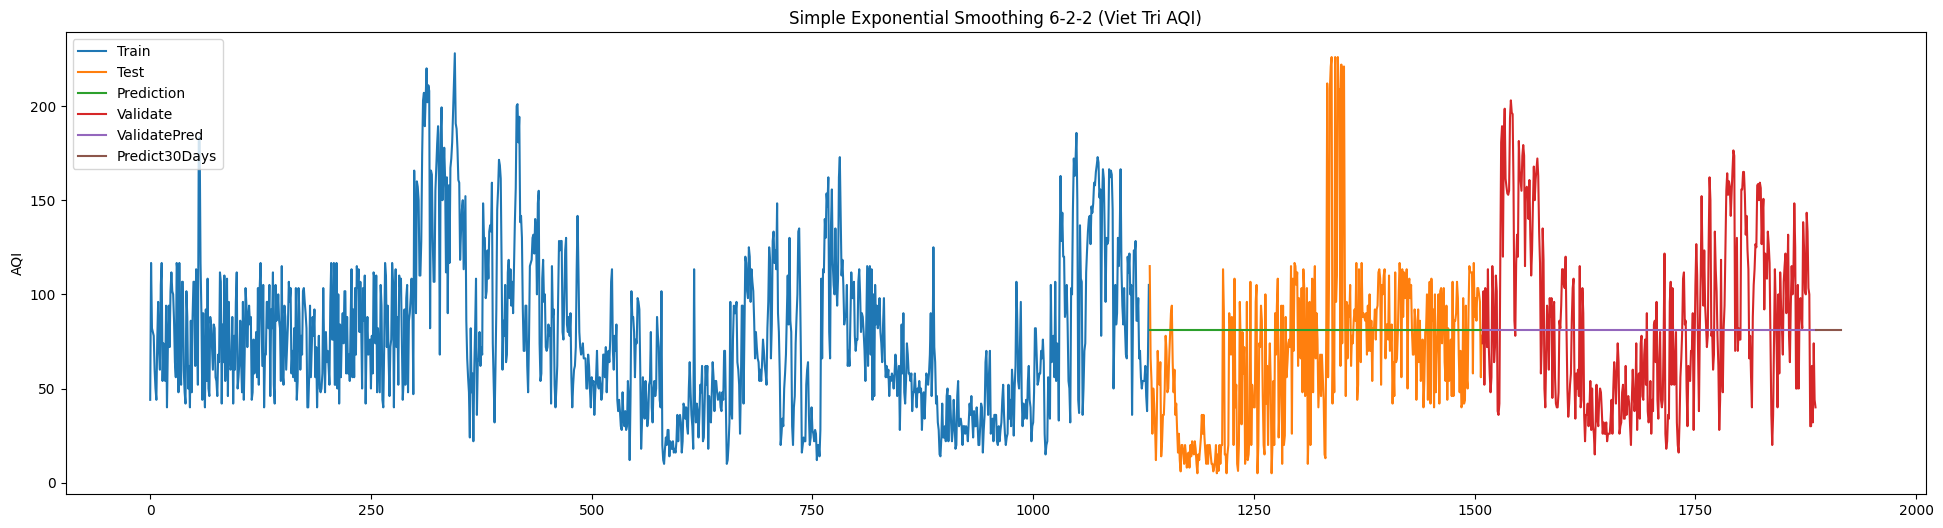

In [20]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(val_data_HN.index, val_data_HN['AQI'])
plt.plot(val_data_HN.index, val_pred_HN)
plt.plot(last_data_HN, pred_30days_HN)
plt.title('Simple Exponential Smoothing 6-2-2 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(val_data_DN.index, val_data_DN['AQI'])
plt.plot(val_data_DN.index, val_pred_DN)
plt.plot(last_data_DN, pred_30days_DN)
plt.title('Simple Exponential Smoothing 6-2-2 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(val_data_VT.index, val_data_VT['AQI'])
plt.plot(val_data_VT.index, val_pred_VT)
plt.plot(last_data_VT, pred_30days_VT)
plt.title('Simple Exponential Smoothing 6-2-2 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

In [21]:
# Chia dữ liệu train, test, validate theo tỉ lệ 7:2:1

# Hà Nội
train_size_HN = int(0.7 * len(df_HN))
test_size_HN = int(0.2 * len(df_HN))
val_size_HN = len(df_HN) - train_size_HN - test_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]
val_data_HN = df_HN[train_size_HN+test_size_HN:]

# Đà Nẵng
train_size_DN = int(0.7 * len(df_DN))
test_size_DN = int(0.2 * len(df_DN))
val_size_DN = len(df_DN) - train_size_DN - test_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]
val_data_DN = df_DN[train_size_DN+test_size_DN:]

#Việt Trì
train_size_VT = int(0.7 * len(df_VT))
test_size_VT = int(0.2 * len(df_VT))
val_size_VT = len(df_VT) - train_size_VT - test_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]
val_data_VT = df_VT[train_size_VT+test_size_VT:]

In [22]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [23]:
# Dự đoán trên tập test, validate, và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
val_pred_HN = model_HN.forecast(len(val_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
val_pred_DN = model_DN.forecast(len(val_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
val_pred_VT = model_VT.forecast(len(val_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT))

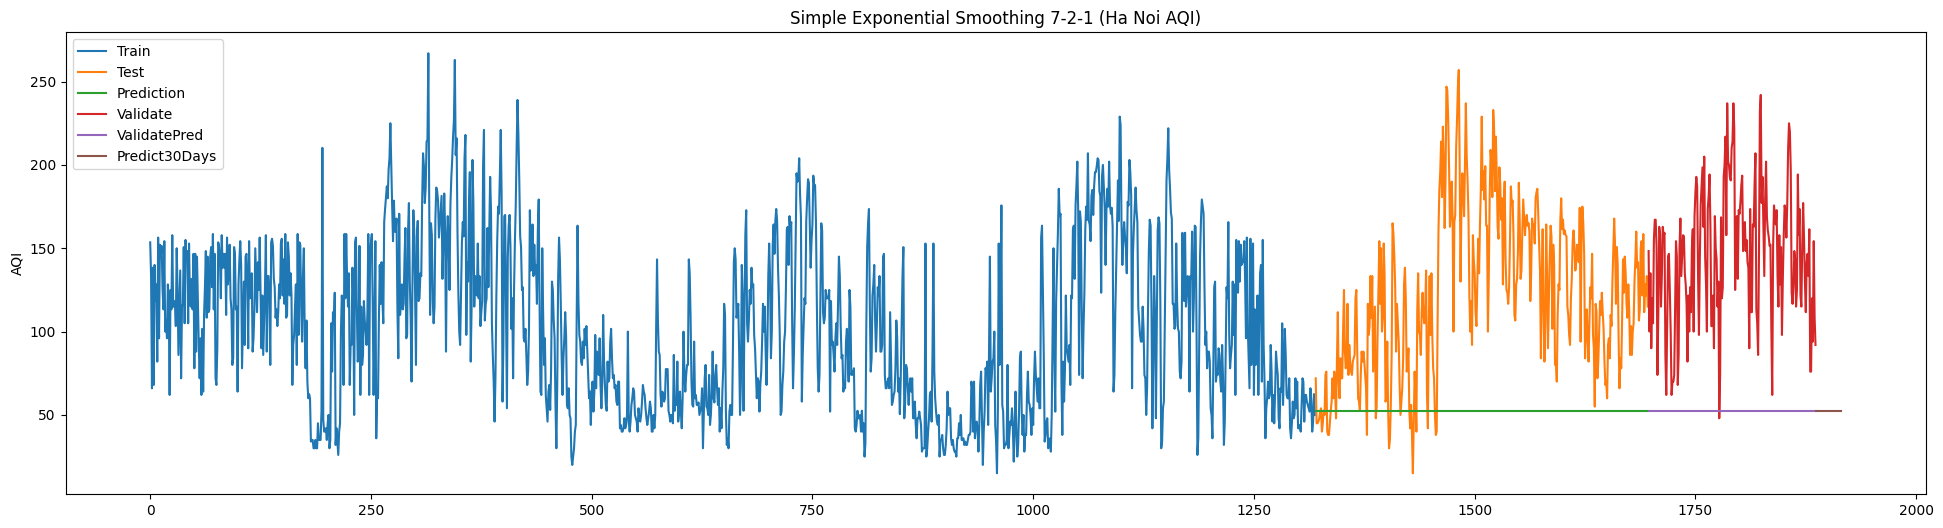

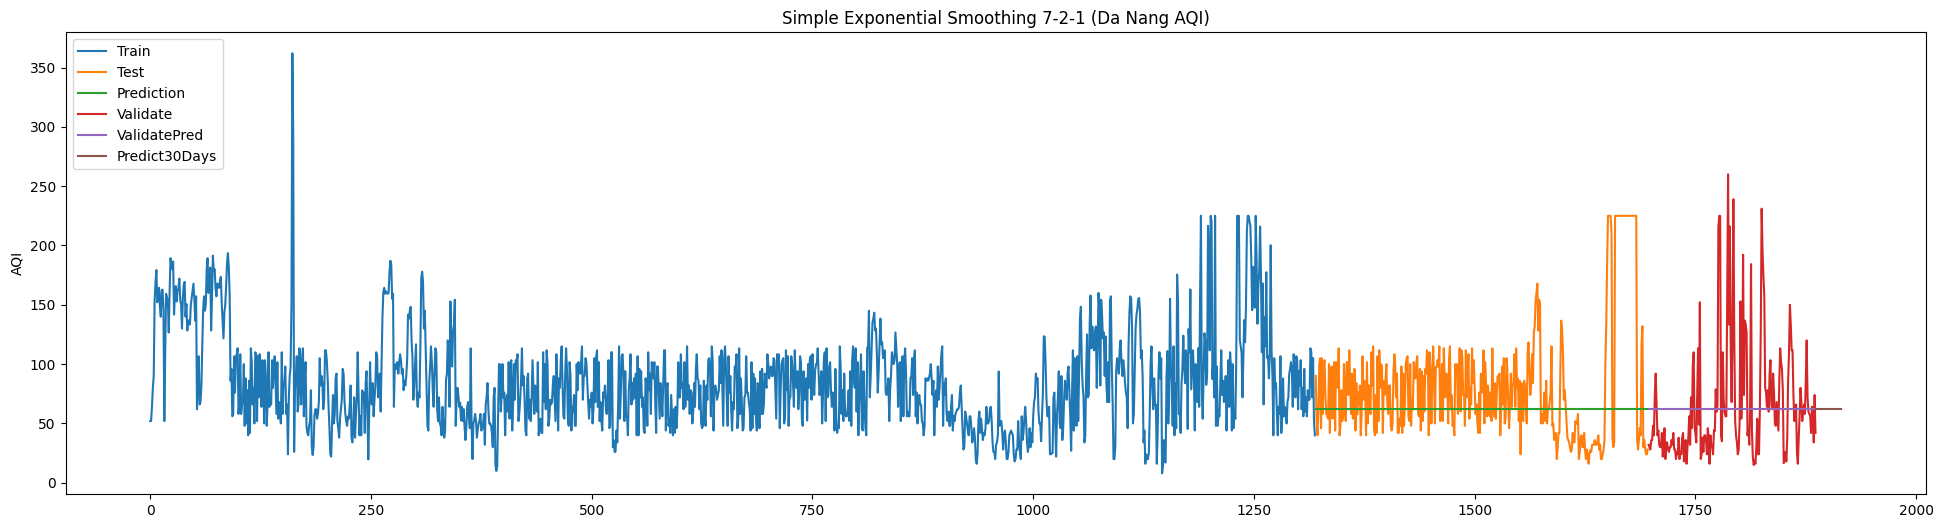

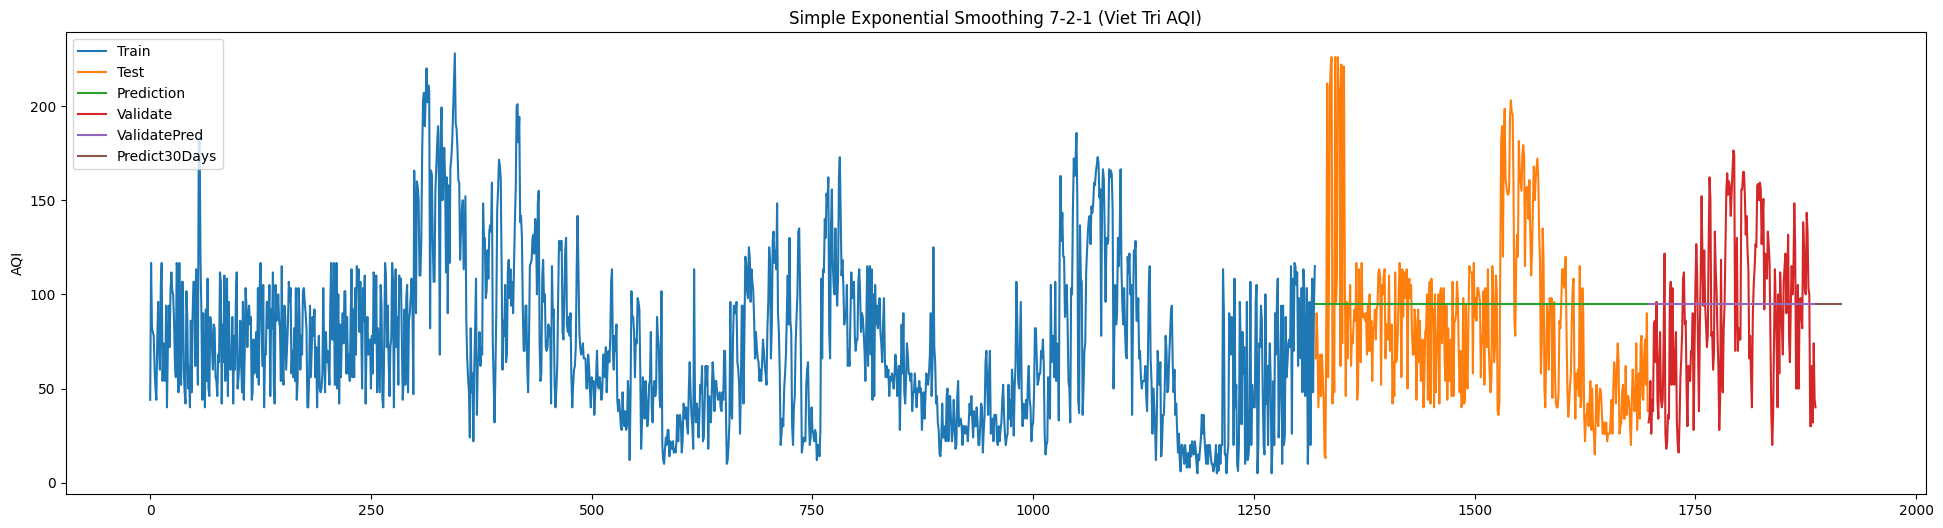

In [24]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(val_data_HN.index, val_data_HN['AQI'])
plt.plot(val_data_HN.index, val_pred_HN)
plt.plot(last_data_HN, pred_30days_HN)
plt.title('Simple Exponential Smoothing 7-2-1 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(val_data_DN.index, val_data_DN['AQI'])
plt.plot(val_data_DN.index, val_pred_DN)
plt.plot(last_data_DN, pred_30days_DN)
plt.title('Simple Exponential Smoothing 7-2-1 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(val_data_VT.index, val_data_VT['AQI'])
plt.plot(val_data_VT.index, val_pred_VT)
plt.plot(last_data_VT, pred_30days_VT)
plt.title('Simple Exponential Smoothing 7-2-1 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

In [25]:
# Chia dữ liệu train, test, validate theo tỉ lệ 8:1:1

# Hà Nội
train_size_HN = int(0.8 * len(df_HN))
test_size_HN = int(0.1 * len(df_HN))
val_size_HN = len(df_HN) - train_size_HN - test_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]
val_data_HN = df_HN[train_size_HN+test_size_HN:]

# Đà Nẵng
train_size_DN = int(0.8 * len(df_DN))
test_size_DN = int(0.1 * len(df_DN))
val_size_DN = len(df_DN) - train_size_DN - test_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]
val_data_DN = df_DN[train_size_DN+test_size_DN:]

#Việt Trì
train_size_VT = int(0.8 * len(df_VT))
test_size_VT = int(0.1 * len(df_VT))
val_size_VT = len(df_VT) - train_size_VT - test_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]
val_data_VT = df_VT[train_size_VT+test_size_VT:]

In [26]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [27]:
# Dự đoán trên tập test, validate, và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
val_pred_HN = model_HN.forecast(len(val_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
val_pred_DN = model_DN.forecast(len(val_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
val_pred_VT = model_VT.forecast(len(val_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT))

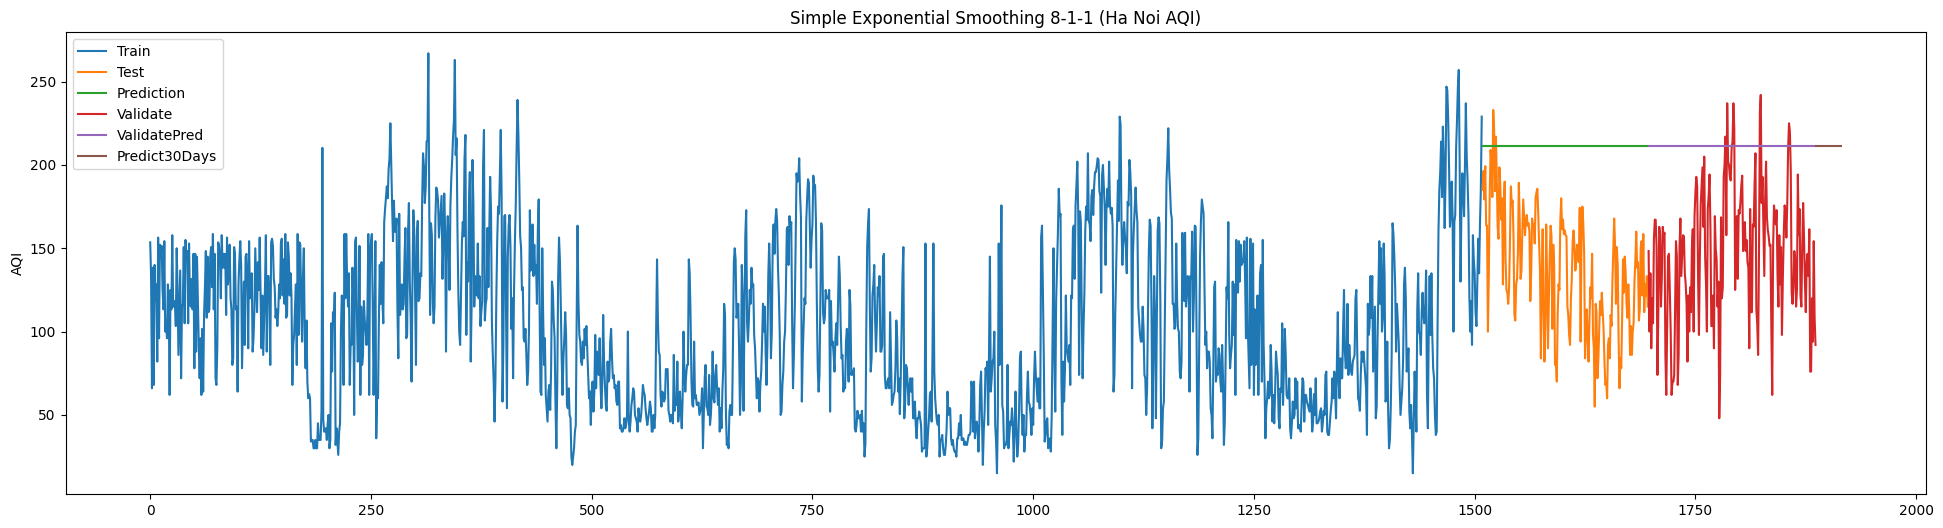

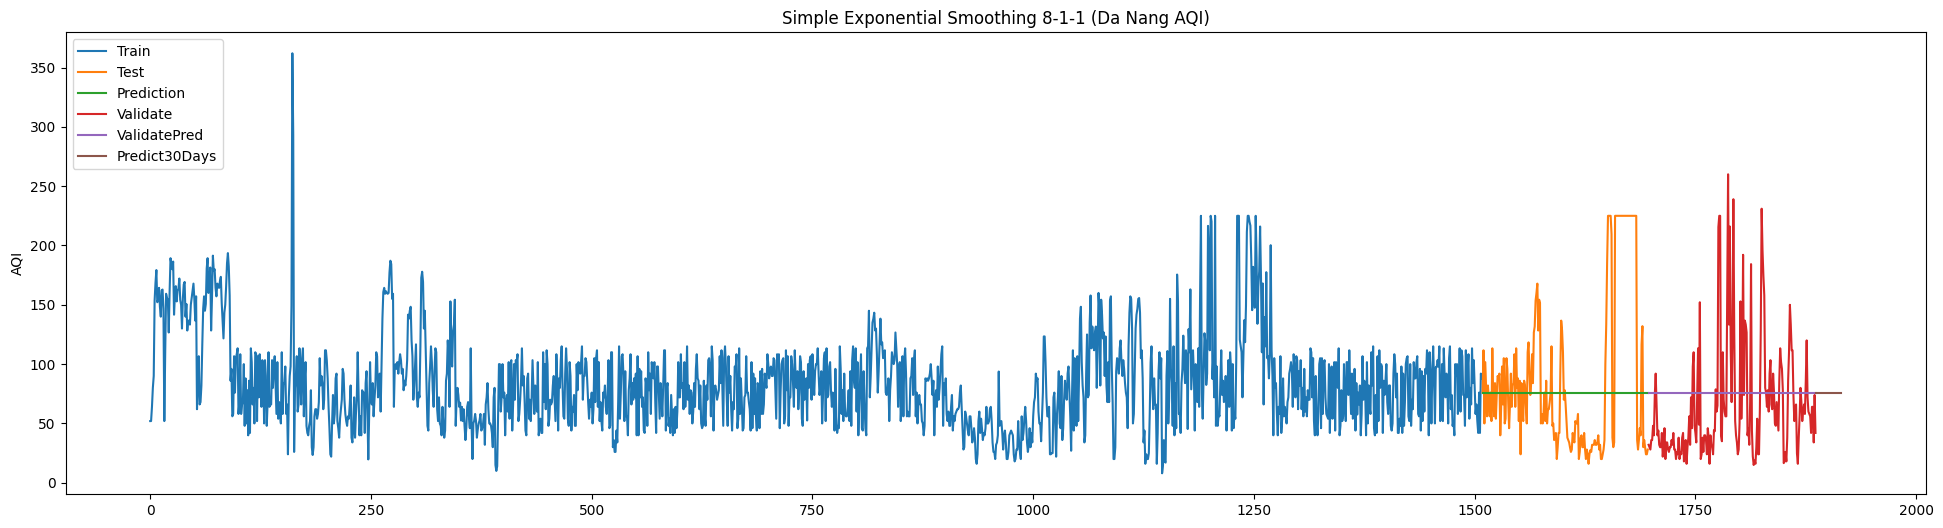

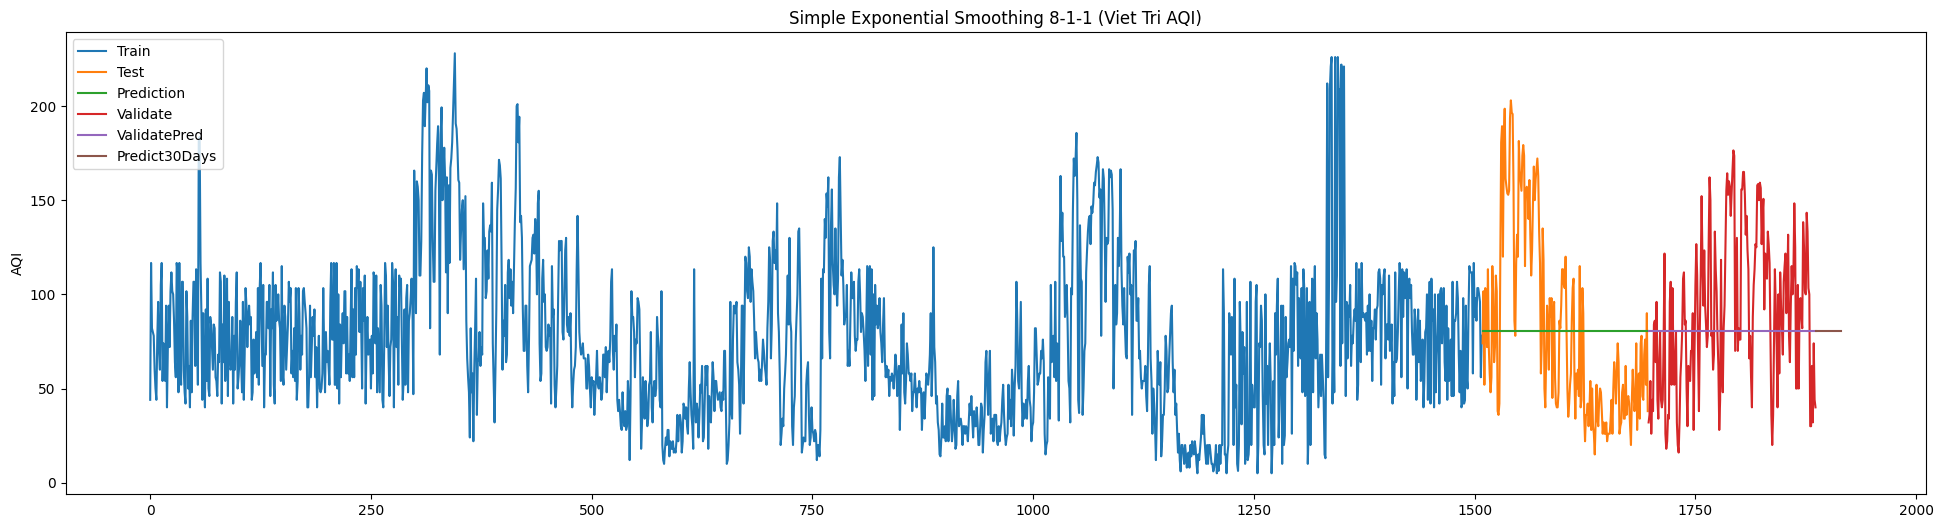

In [28]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(val_data_HN.index, val_data_HN['AQI'])
plt.plot(val_data_HN.index, val_pred_HN)
plt.plot(last_data_HN, pred_30days_HN)
plt.title('Simple Exponential Smoothing 8-1-1 (Ha Noi AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(val_data_DN.index, val_data_DN['AQI'])
plt.plot(val_data_DN.index, val_pred_DN)
plt.plot(last_data_DN, pred_30days_DN)
plt.title('Simple Exponential Smoothing 8-1-1 (Da Nang AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(val_data_VT.index, val_data_VT['AQI'])
plt.plot(val_data_VT.index, val_pred_VT)
plt.plot(last_data_VT, pred_30days_VT)
plt.title('Simple Exponential Smoothing 8-1-1 (Viet Tri AQI)')
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'ValidatePred', 'Predict30Days'], loc='upper left')